# Análisis de datos - Trabajo Integrador

**Alumno**: Milton Lopez

### El dataset elegido para realizar el análisis es MNIST

#### Preguntas a responder

- ¿Se pueden encontrar heurísticas interesantes para clasificar los datos en
función de sus valores?
- ¿Es posible encontrar representaciones de baja dimensionalidad que nos
permitan visualizar posibles grupos?

## Carga de datos y visualización inicial

In [34]:
# Importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

In [35]:
# Cargamos los datos

# sklearn ya contiene al dataset MNIST built-in.
# Por lo tanto no hace falta descargar el dataset en csv y usar pandas para la lectura.
X, y = load_digits(return_X_y=True)

In [36]:
# Dimensiones del dataset
n_samples, n_features = X.reshape((len(X), -1)).shape
n_classes = len(np.unique(y))

print(f"Total de muestras (imágenes): {n_samples}")
print(f"Total de features (píxeles]) por muestra: {n_features}")
print(f"Número de clases (dígitos únicos): {n_classes}")

Total de muestras (imágenes): 1797
Total de features (píxeles]) por muestra: 64
Número de clases (dígitos únicos): 10


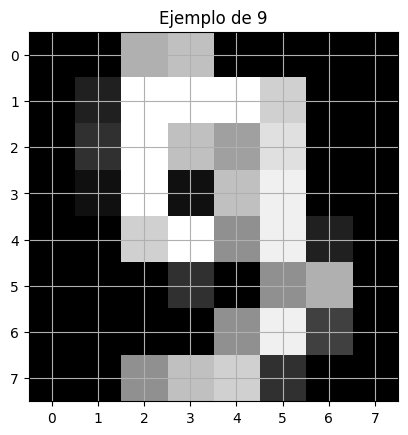

In [37]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[9]))
plt.imshow(X[9, :].reshape((8, 8)), cmap='gray')
plt.show()

### Vemos que MNIST en sklearn contiene:
- 1797 imágenes
- 64 píxeles por dígito (imágenes de 8x8)
- 10 tipos de números (del 0 al 9)

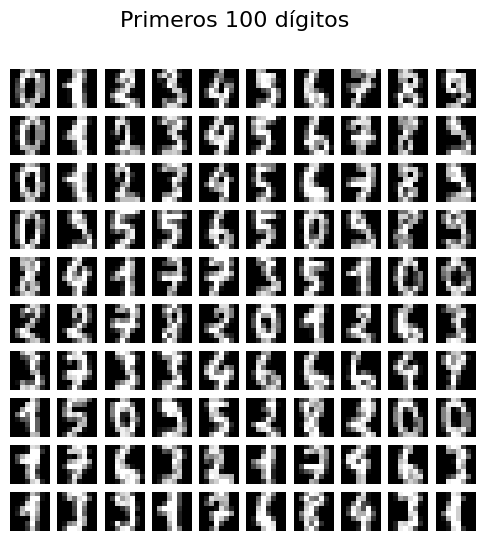

In [38]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap="gray")
    ax.axis("off")
_ = fig.suptitle("Primeros 100 dígitos", fontsize=16)

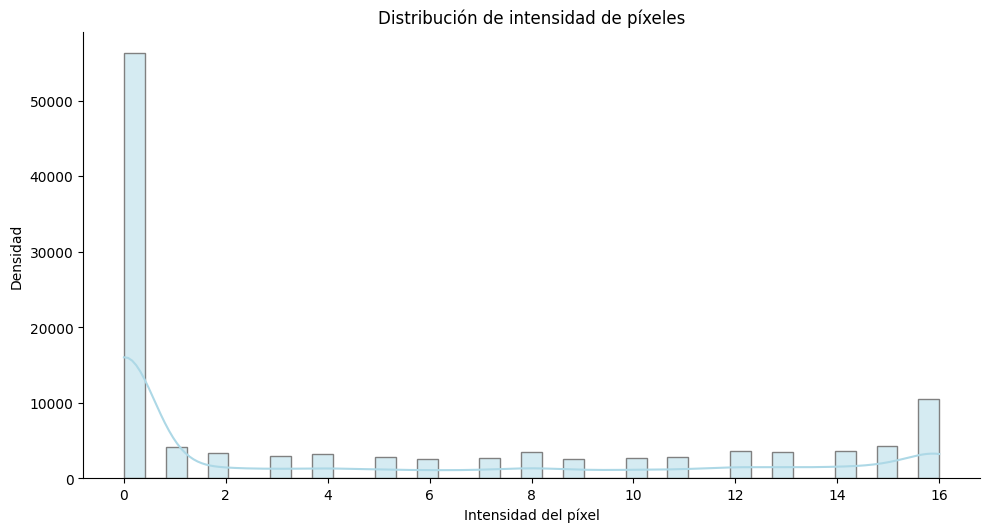

In [39]:
# Intensidad y valores máximos/mínimos de píxeles

sns.displot(
    X.reshape(-1),
    kde=True,
    height=5,
    aspect=2,
    color="lightblue",
    edgecolor="gray",
)
plt.title("Distribución de intensidad de píxeles")
plt.xlabel("Intensidad del píxel")
plt.ylabel("Densidad")
plt.show()

## Identificación de tipos de datos (categórico, ordinal, etc.)

### Imágenes (features): 
Cada imagen es una matriz de 8x8 píxeles, y cada píxel representa la intensidad en escala de grises.

Los valores son de 0 a 16, donde 0 es negro y 16 es blanco.
Estos datos son `numéricos` y se usan para clasificación, ya que las diferencias en las intensidades sirven para distinguir entre los diferentes dígitos.

### Labels (objetivo): 
Los labels son numéricos (0 a 9) y representan el dígito en cada imagen.
Estos son datos `categóricos ordinales` porque tienen un orden claro (0 a 9). Sirven de dato informativo para la clasificación (lo que se quiere predecir).

El objetivo principal de trabajo con el dataset MNIST es clasificar cada imagen en una de las 10 categorías usando las intensidades de los píxeles.

## Identificación de variables de entrada y salida

### Variables de entrada (features):
Son las intensidades de los píxeles en las imágenes de los dígitos.

### Variables de salida (objetivo):
Es el dígito que representa cada imagen (0-9).

### Análisis de variables de entrada

#### Intensidad de píxeles para cada dígito

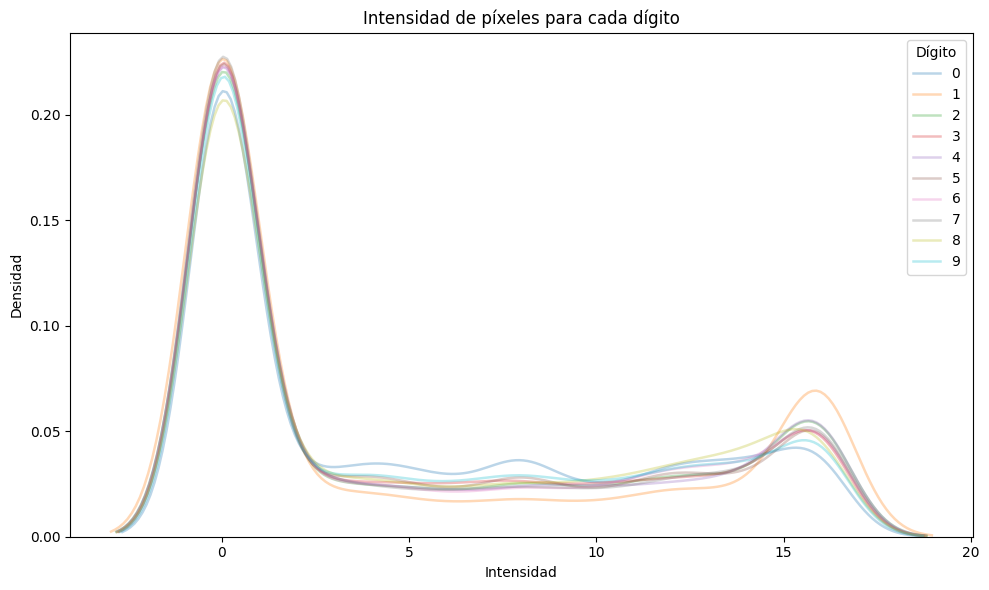

In [40]:
# Intensidad de píxeles para cada dígito

fig, ax = plt.subplots(figsize=(10, 6))

for digit in range(10):
    intensity_values = X[y == digit].flatten()
    sns.kdeplot(intensity_values, fill=False, alpha=0.3, linewidth=1.8, ax=ax, label=str(digit))

ax.set_title('Intensidad de píxeles para cada dígito')
ax.set_xlabel('Intensidad')
ax.set_ylabel('Densidad')
ax.legend(title='Dígito', loc='upper right')

plt.tight_layout()
plt.show()

#### Histogramas de píxeles de cada dígito

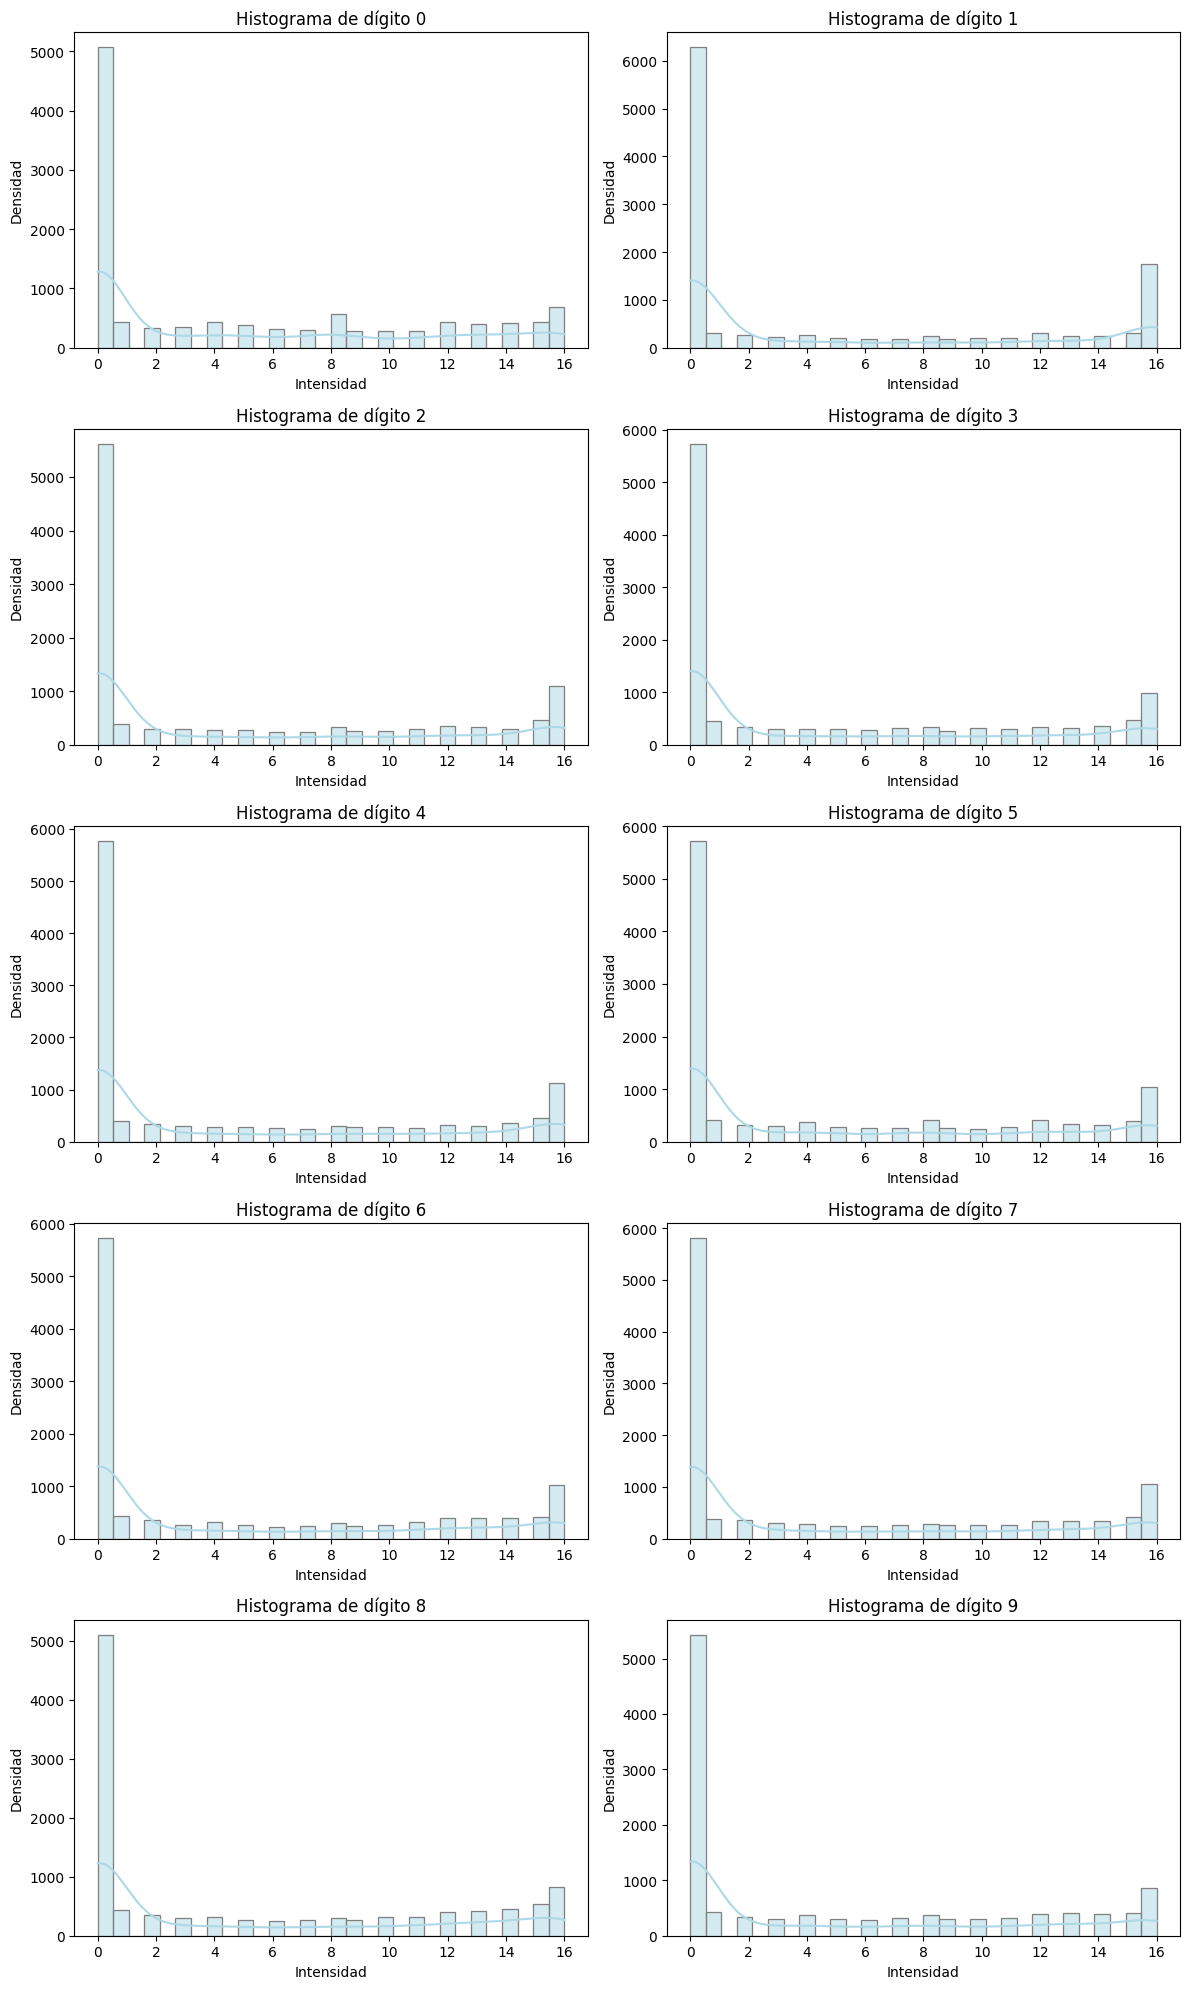

In [41]:
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Ploteo de histograma
for digit in range(10):
    row = digit // 2
    col = digit % 2

    intensity_values = X[y == digit].flatten()
    sns.histplot(
        intensity_values,
        bins=30,
        color="lightblue",
        edgecolor="gray",
        ax=axs[row, col],
        kde=True,
    )
    axs[row, col].set_title(f"Histograma de dígito {digit}")
    axs[row, col].set_xlabel("Intensidad")
    axs[row, col].set_ylabel("Densidad")

plt.tight_layout()
plt.show()

#### Distribución de intensidad de píxeles - Media, mediana, desviación estándar

Intensidad media: 4.88
Intensidad mediana: 1.00
Desviación estándar de intensidad: 6.02


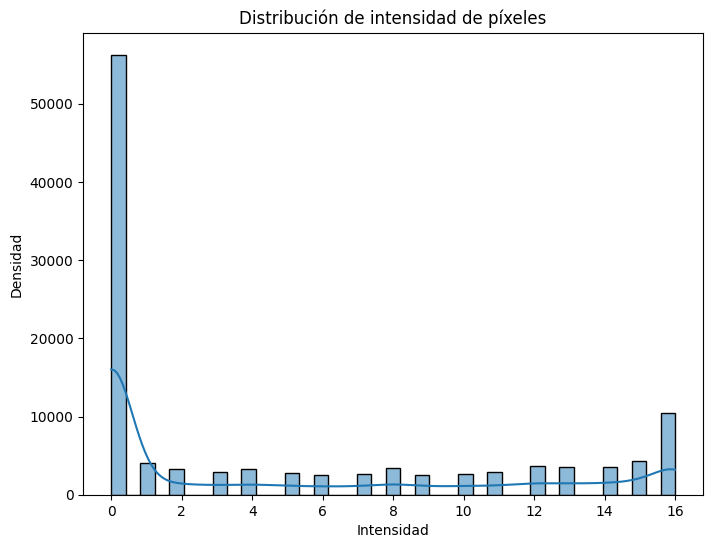

In [42]:
X_flattened = X.reshape((X.shape[0], -1))

# Media, mediana, y desviación estándar de intensidades
mean_intensity = np.mean(X_flattened)
median_intensity = np.median(X_flattened)
std_intensity = np.std(X_flattened)

print(f"Intensidad media: {mean_intensity:.2f}")
print(f"Intensidad mediana: {median_intensity:.2f}")
print(f"Desviación estándar de intensidad: {std_intensity:.2f}")

plt.figure(figsize=(8, 6))
sns.histplot(data=X_flattened.ravel(), kde=True)
plt.title("Distribución de intensidad de píxeles")
plt.xlabel("Intensidad")
plt.ylabel("Densidad")
plt.show()

##### Media de intensidad: 4.88
   - Una media de 4.88 en una escala de 0 (negro) a 16 (blanco) indica que en promedio, la intensidad de los píxeles en las imágenes es relativamente baja.
   - Esto indica que las imágenes tienen una mayor cantidad de píxeles más oscuros lo cual es consistente con dígitos blancos y el predominante fondo negro.

##### Mediana de intensidad: 1.00
   - El 50% de los píxeles tienen una intensidad menor o igual a 1, y el otro 50% tiene una intensidad mayor a 1.
   - Esto implica que la mayoría de los píxeles son negros o muy oscuros, lo cual es coherente con el punto anterior (fondos negros y dígitos blancos).

##### Desviación estándar de intensidad (Standard deviation of intensity): 6.02
   - Una desviación estándar de 6.02 en una escala de 0 a 16 indica una dispersión relativamente alta en las intensidades de los píxeles. Aunque la mayoría de los píxeles son oscuros también hay píxeles con intensidades más altas que corresponden a los píxeles de los dígitos dibujados.


##### Observaciones:

- Una potencial extracción de features centrada en patrones blancos (edge detectors, etc.) puede ser efectiva para capturar información relevante de los dígitos, ya que los dígitos son blancos y los fondos negros.

### Análisis de variables de salida

#### Balance de clases
El balance de clases es importante para entrenar modelos que no resulten sesgados a una clase (dígito) específica.

Evaluamos la distribución de las clases ploteando la distribución de dígitos (cantidad de ocurrencias cada dígito único) en el dataset. 

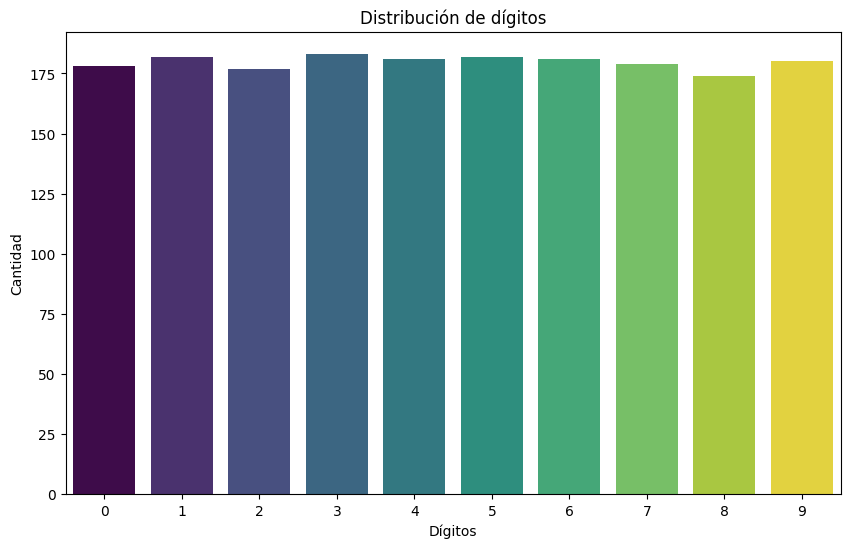

In [43]:
n_samples, n_features = X.reshape((len(X), -1)).shape
n_classes = len(np.unique(y))

# Cantidad de cada dígito
unique, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique, y=counts, palette="viridis", hue=unique, legend=False)
plt.xlabel("Dígitos")
plt.ylabel('Cantidad')
plt.title('Distribución de dígitos')
plt.xticks(unique)
plt.grid(axis="y", linestyle="", alpha=0.7)
plt.show()

La distribución de los dígitos en MNIST está relativamente balanceada.

Cada clase (dígito) tiene alrededor de 180 instancias. Esto indica una buena representación de todas las categorías. Si necesitamos entrenar modelos, este balanceo en el dataset reduce el riesgo de sesgo hacia clases más frecuentes.

#### Variabilidad y outliers en clasificación

Un análisis interesante para realizar con respecto a la variable de salida (dígitos) es observar si en este dataset puede haber muchos outliers a la hora de clasificar. Por intuición, podemos pensar que algunos dígitos pueden ser más fáciles de clasificar que otros. Por ejemplo, un 1 puede ser relativamente fácil de distinguir (todos dibujamos un 1 de forma similar) en comparación con la diferencia entre un 5 y un 2, o un 3 y un 8.

Por esta razón vamos a explorar outliers para verificar qué dígitos pueden ser más difíciles de clasificar.

Para esto, se calcula la distancia euclidea de cada imagen al centroide (media) de su label.

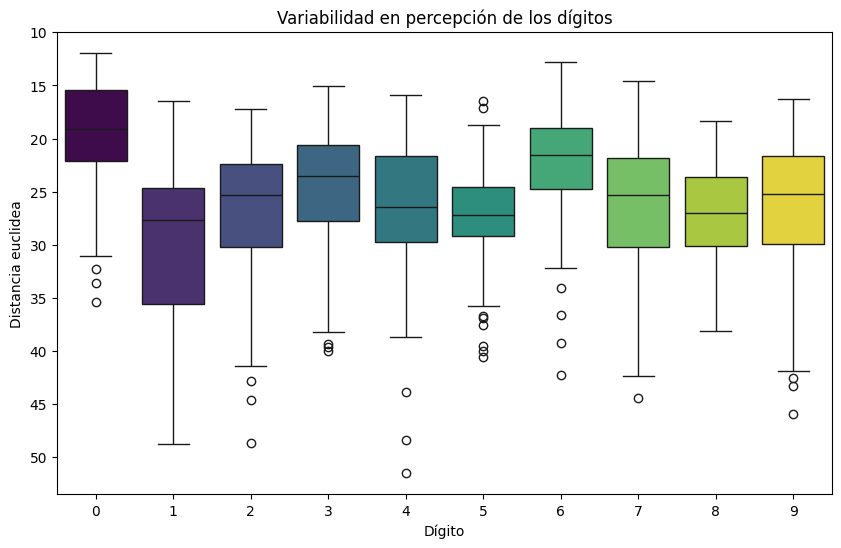

In [44]:
mean_images = {}
for digit in range(10):
    mean_images[digit] = np.mean(X[y == digit], axis=0)

# Distancia euclidea de cada imagen a la media de su label
distances = []
for i in range(len(X)):
    digit = y[i]
    distance = np.sqrt(np.sum((X[i] - mean_images[digit])**2))
    distances.append({'Dígito': digit, 'Distancia': distance})

df = pd.DataFrame(distances)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dígito', y='Distancia', data=df, hue='Dígito', legend=False, palette='viridis')
plt.xlabel('Dígito')
plt.ylabel('Distancia euclidea')
plt.title('Variabilidad en percepción de los dígitos')
plt.gca().invert_yaxis()
plt.show()

##### Observaciones

- El número 8 parece no tener outliers en este dataset.
- Los 1 tienen las distancias más bajas: consistente con la intuición planteada anteriormente, no hay mucha variabilidad en la forma en que se dibuja este dígito.
- La mayor variabilidad parece estar en 0, 2, 3, y 6. La mayoría de los dígitos tienen al menos unos pocos casos con una distancia alta a su centroide.

Vamos a visualizar algunos de estos dígitos dibujados.

In [45]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see)[0]
        plt.figure(figsize=(10, 5))

        n_images = min(len(indices), 50)
        for digit_num in range(n_images): 
            plt.subplot(5, 10, digit_num + 1)

            mat_data = X[indices[digit_num]].reshape(8, 8)
            plt.imshow(mat_data, cmap='gray')
            plt.xticks([])
            plt.yticks([])
        plt.show()
    else:
        print("Dígito debe estar entre 0 y 9.")

#### Variabilidad de 0 (ceros)

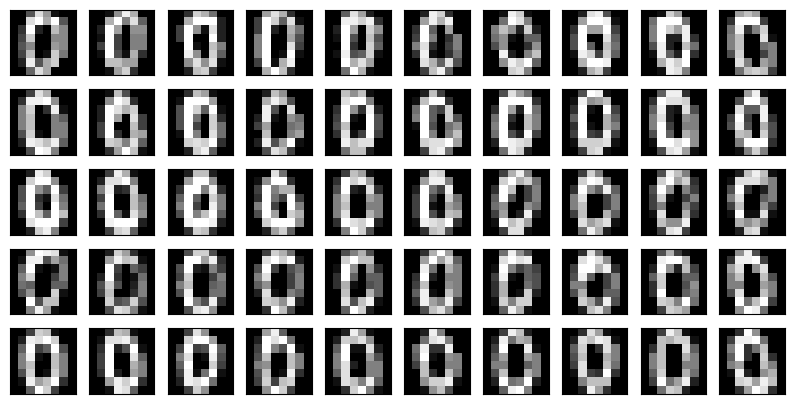

In [46]:
show_images_by_digit(0)

#### Variabilidad de 1 (unos)

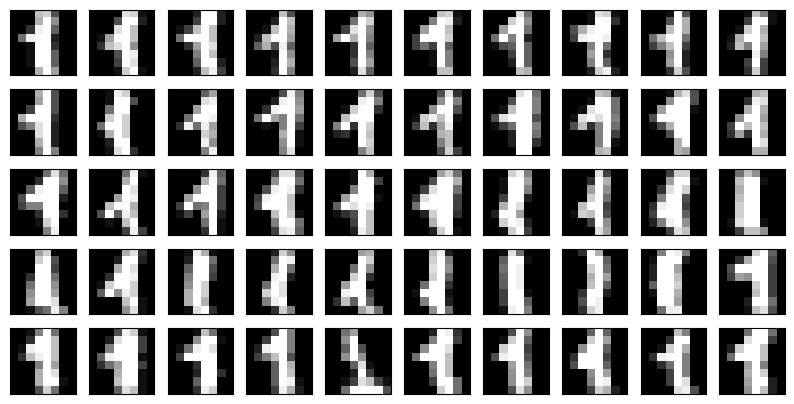

In [47]:
show_images_by_digit(1)

#### Variabilidad de 6 (seis)

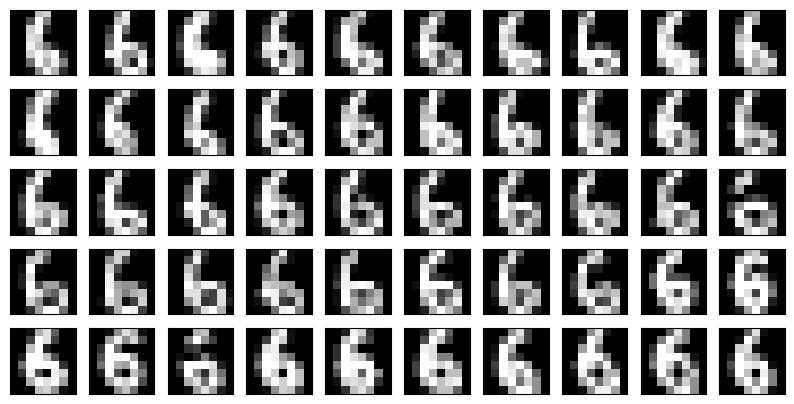

In [48]:
show_images_by_digit(6)

#### Codificación de variables de salida
En MNIST, los dígitos ya están codificados como enteros (0-9). Esta representación numérica es adecuada para muchos algoritmos de ML, con lo cual no es necesario realizar ninguna codificación extra por el momento.